In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
import keras_tuner as kt

In [3]:
df = pd.read_csv("D:\study\ML\diabetes.csv")

In [4]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_skl = scaler.fit_transform(X)

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_skl,y,test_size=0.2,random_state=1)

In [49]:
def build_model(hp):
    model = Sequential()
    
    counter = 0
    for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
        if counter == 0:
            model.add(
                    Dense(
                        hp.Int('units'+str(i),min_value=8,max_value=256,step=8),
                        activation = hp.Choice('activation'+str(i),values=['relu','tanh','sigmoid']),
                        input_dim=8
                    )
            )
            model.add(
                    Dropout(
                            hp.Choice('dropout'+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
                    )
            )
            
        else:
            model.add(
                    Dense(
                        hp.Int('units'+str(i),min_value=8,max_value=256,step=8),
                        activation = hp.Choice('activation'+str(i),values=['relu','tanh','sigmoid'])
                    )
            )
            model.add(
                    Dropout(
                            hp.Choice('dropout'+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
                    )
            )
            
        counter += 1
        
    model.add(Dense(1,activation='sigmoid'))
        
    model.compile(
        hp.Choice('optimizer',values=['rmsprop','adam','sgd','nadam','adadelta']),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [50]:
tuner = kt.RandomSearch(build_model,
                        objective='val_accuracy',
                        max_trials=100,
                        directory = 'my_dir',
                        project_name = 'full tuner4'
                       )

In [51]:
tuner.search(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Trial 100 Complete [00h 00m 04s]
val_accuracy: 0.6428571343421936

Best val_accuracy So Far: 0.8246753215789795
Total elapsed time: 00h 05m 42s


In [52]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 5,
 'units0': 184,
 'activation0': 'relu',
 'dropout0': 0.7,
 'optimizer': 'nadam',
 'units1': 144,
 'activation1': 'tanh',
 'dropout1': 0.4,
 'units2': 56,
 'activation2': 'tanh',
 'dropout2': 0.6,
 'units3': 144,
 'activation3': 'sigmoid',
 'dropout3': 0.5,
 'units4': 128,
 'activation4': 'relu',
 'dropout4': 0.1,
 'units5': 48,
 'activation5': 'sigmoid',
 'dropout5': 0.2,
 'units6': 192,
 'activation6': 'tanh',
 'dropout6': 0.1,
 'units7': 256,
 'activation7': 'tanh',
 'dropout7': 0.2,
 'units8': 8,
 'activation8': 'tanh',
 'dropout8': 0.6,
 'units9': 152,
 'activation9': 'sigmoid',
 'dropout9': 0.7}

In [53]:
from tensorflow.keras.callbacks import EarlyStopping

In [60]:
callback = EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0.00001,
    patience = 10,
    verbose = 1,
    mode='auto',
    baseline = None,
    restore_best_weights = True
)

In [61]:
model = tuner.get_best_models(num_models=1)[0]

In [62]:
history = model.fit(x_train,y_train,epochs=100,initial_epoch=5,validation_data=(x_test,y_test),callbacks=callback)

Epoch 6/100
20/20 [==============================] - 2s 13ms/step - loss: 0.5181 - accuracy: 0.7557 - val_loss: 0.4855 - val_accuracy: 0.7662
Epoch 7/100
20/20 [==============================] - 0s 6ms/step - loss: 0.5243 - accuracy: 0.7345 - val_loss: 0.4694 - val_accuracy: 0.7987
Epoch 8/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4999 - accuracy: 0.7508 - val_loss: 0.4625 - val_accuracy: 0.7857
Epoch 9/100
20/20 [==============================] - 0s 6ms/step - loss: 0.5028 - accuracy: 0.7410 - val_loss: 0.4600 - val_accuracy: 0.7987
Epoch 10/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4948 - accuracy: 0.7541 - val_loss: 0.4637 - val_accuracy: 0.8117
Epoch 11/100
20/20 [==============================] - 0s 6ms/step - loss: 0.4919 - accuracy: 0.7606 - val_loss: 0.4648 - val_accuracy: 0.7857
Epoch 12/100
20/20 [==============================] - 0s 6ms/step - loss: 0.5207 - accuracy: 0.7313 - val_loss: 0.4551 - val_accuracy: 0.8117
Epoch 13/

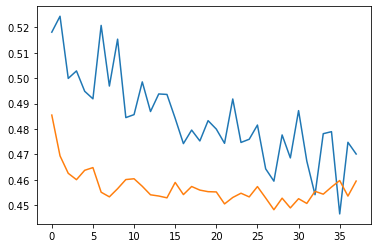

In [63]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])